# Cimentación sobre un deposito de suelo estratificado

## Descripción del problema

En este notebook se estudia la respuesta de 3 propuestas de cimentación para transmitir las cargas de una columna de un edificio al suelo. El proposito del análisis es identificar diferentes alternativas para la transmisión de las cargas.

El suelo corresponde a un sitio conformado por 5 estratos horizontales que a la vez se apoyan sobre una roca muy rigida en comparación con la rigidez de los diferentes estratos.

Se estudiará la respuesta del deposito de suelo cuando las cargas se transmiten mediante:

- (i) Una cimentación superficial (zapata simple)

- (ii) Una cimentación profunda con 1 solo pilote

- (iii) Una cimentación profunda con 2 pilotes .

<center><img src="img/complete.png" alt="files" style="width:800px"></center>


En cada caso se asume que las cargas a transmitir se determinaron previamente de un análisis independiente del edificio en el cual este se asumio como empotrado a nivel de la cimentación. Estas cargas corresponden entonces a las reacciones vertical, horizontal y de momento $P$, $V$ y $M$ respectivamente y calculadas en el análisis del edificio.


## Propiedades del deposito de suelo

Un estudio de suelos ha determinado mediante exploración in-situ y diferentes ensayos de laboratorio que el sitio puede caracterizarse mediante las propiedades reportadas en la tabla adjunta. En esta se especifican para cada estrato, el modulo de elasticidad $E$, el peso especifico $\gamma$, la relación de Poisson $\nu$, el angulo de fricción (en grados) $\phi$ y el espesor del estrato $h_i$.

<center>
    <img src="img/perfil_tema_01.png"
         alt="Desplazamientos en el sistema de referencia local"
         style="width:600px">
</center>


Adicionalmente el ingeniero geotecnista ha especificado que los estratos de suelo **no tienen resistencia a la tracción** mientras que la resistencia a la compresión puede calcularse a partir de la siguiente formula empirica:

$$ σ_{comp}=0.06 \sigma_{efec} e^{(0.17* \phi)}$$

y en la cual $\sigma_{efec}$ es el esfuerzo efectivo de un suelo a una profundidad $z$ y peso especifico $\gamma$ calculado como

$$\sigma_{efec} = \gamma z$$


Similarmente las resistencias al corte de los diferentes estratos se especifica en la siguiente tabla:


<center>
    <img src="img/fuste.png"
         alt="Desplazamientos en el sistema de referencia local"
         style="width:300px">
</center>

## Paso de las cargas del edificio a la cimentación

En la figura se muestra una columna típica conjuntamente con las cargas que esta transmitirá a la fundación (calculadas del analisis del edificio). Notese que la columna se encuentra a tracción debida a la carga axial.

<center>
    <img src="img/columna.png"
         alt="Diagrama de la presa."
         style="width:200px">
</center>

Asumamos que la columna tiene una sección transversal de $1.0 \times 1.0$m. Para transmitir el momento de $1320.0$ $tf-m$ aplicaremos 1 par de fuerzas como se esquematiza en la siguiente figura. Notese que el brazo de palanca es de $0.5$m y que las fuerzas deben tener el signo correcto consistente con el signo del momento.


<center>
    <img src="img/par_momento.png"
         alt="Diagrama de la presa."
         style="width:200px">
</center>

Para aplicar las fuerzas iguales y opuestas correspondientes al par equivalente en el modelo por elementos finitos de `SolidsPy` la interface entre la columna y la zapata se divide en 2 líneas físicas.

Similarmente la carga axial $P = 246$ tf y el cortante $V = 153.0$ tf se aplicarán como 2 fuerzas sobre estas líneas físicas como se muestra en la siguiente figura.

<center>
    <img src="img/reacciones.png"
         alt="Diagrama de la presa."
         style="width:400px">
</center>


Superponiendo ahora los 3 sistemas de fuerzas se obtienen el estado de cargas final a ser impuesto sobre el modelo por elementos finitos.

<center>
    <img src="img/cargas_totales.png"
         alt="Diagrama de la presa."
         style="width:400px">
    
  
</center>

### 1. Ejecución del análisis

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import solidspy.postprocesor as pos     # Rutinas de postprocesado
import aux_functions as aux             # Rutinas externas al programa y creadas para la automatización de algunas tareas.

In [3]:
def crosshairs(x, y):
    """Función para dibujar líneas horizontales y verticales en un gráfico.
    
    Parámetros:
    x (float): Coordenada x del punto de intersección de las líneas.
    y (float): Coordenada y del punto de intersección de las líneas.
    
    Retorna:
    None: No hay valor de retorno explícito, solo traza las líneas en el gráfico.
    """
    # Línea horizontal en y
    plt.axhline(y, color='r', zorder=10)
    # Línea vertical en x
    plt.axvline(x, color='r', zorder=10)
    # Devuelve None (no hay resultado explícito)
    return

Calculo de resistencia a la compresion

In [4]:
#
# Calculo de resistencias a la compresión de cada estrato
#
import pandas as pd
z     = [2.0 , 5.0 , 8.0 , 12.0 , 22]
phi   = [23.0, 28.0, 29.0 , 30.0 , 30.0]
gamma = [1.6 , 1.7 , 1.85 , 1.80 , 1.90]
Sc = aux.properties(z , phi, gamma)
pd.DataFrame(Sc)

,0
0,9.580599
1,59.540422
2,122.881007
3,212.572392
4,411.366944


Para realizar el análisis de tensiones defina las cargas `(P1, P2, V1 , V2)` a ser distribuidas sobre los nudos de las lineas físicas (ver esquemas de paso de cargas del edificio a la cimentación).

In [5]:
id_model = 0   # (0): Zapata (1): 1 pilote (2): 2 pilotes 
#P1 =-2517.0
#P2 = 2763.0
P1 =-500#-10.0
P2 =-500#-10.0
V1 = 0.0
V2 = 0.0

In [6]:
if id_model == 0:
    nodes , mats, elements, loads, UG , UC , S_nodes, E_nodes \
          , eles = aux.zapata( P1 , P2 , V1 , V2)
    els_obs = np.vstack((eles[3] , eles[4] , eles[5] , eles[6] , eles[7] ))
else:
    if id_model == 1:
        nodes, mats, elements, loads, UG , UC , S_nodes, E_nodes \
             , eles = aux.pilote_1( P1 , P2 , V1 , V2)
        els_obs = np.vstack((eles[3] , eles[4] , eles[5] , eles[6] \
                  , eles[7] , eles[8] , eles[9] , eles[10] , eles[11]))
    else:
        nodes, mats, elements, loads, UG , UC , S_nodes, E_nodes \
             , eles = aux.pilote_2( P1 , P2 , V1 , V2)
        els_obs = np.vstack((eles[3] , eles[4] , eles[5] , eles[6] , eles[7] ))

### 2. Configuración deformada del modelo.

In [7]:
#aux.deformacionFill(nodes , elements , UC , factor = 1.0 , cmap='cividis')

In [8]:
#E_nodes, S_nodes = pos.strain_nodes(nodes , elements, mats, UC)
#pos.fields_plot(elements, nodes, UC, S_nodes=S_nodes)

In [9]:
# sig_x  = S_nodes[: , 0]
# sig_y  = S_nodes[: , 1]
# sig_xy = S_nodes[: , 2]
# els = np.vstack((eles[6] , eles[5] , eles[7]))
# ref_val= -20
# y_ref= 125.0
# t_ref=1.5
# #aux.filtered(nodes, elements , sig_xy  , ref_val)
# aux.filtered(nodes, els , sig_x  ,ref_val)
# crosshairs(-7, 30)

In [10]:
def filtered(nodes, elements, field, threshold, fig=None):
    """Plot contours for values higher than threshold"""
    if fig is None:
        plt.figure()
    plt.triplot(nodes[:, 1], nodes[:, 2], elements[:, 3:], zorder=3,
                color="#757575")
    if threshold < 0.0 and threshold > field.min():
        plt.tricontourf(nodes[:, 1], nodes[:, 2], elements[:, 3:], field,
                        levels=[field.min(), threshold], zorder=4, cmap="PuRd")
    if threshold > 0.0 and threshold < field.max():
        plt.tricontourf(nodes[:, 1], nodes[:, 2], elements[:, 3:], field,
                        levels=[threshold, field.max()], zorder=4, cmap="PuRd")
    plt.axis("image")
    return None

In [11]:
sig_x  = S_nodes[: , 0]
sig_y  = S_nodes[: , 1]
sig_xy = S_nodes[: , 2]
els = np.vstack((eles[1],eles[2],eles[3] , eles[4] , eles[5] , eles[6] , eles[7]))

### 3. Campos de desplazamientos y tensiones.

<IPython.core.display.Javascript object>


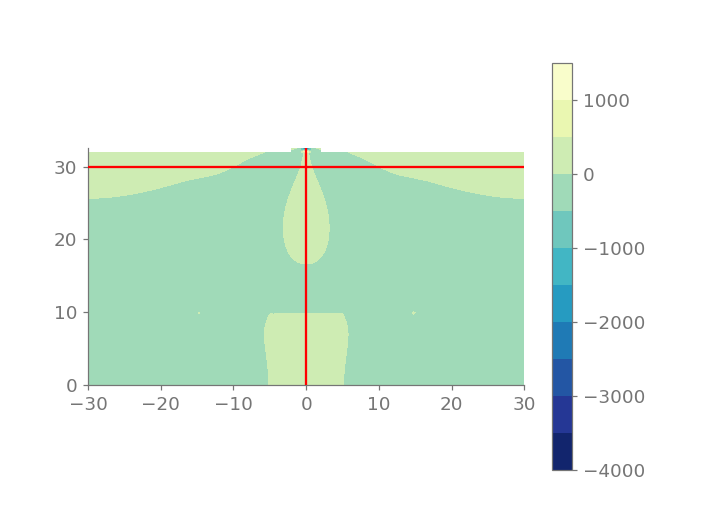

/home/oscar_rincon/oscar/lib/python3.10/site-packages/solidspy/postprocesor.py:108: UserWarning: The following kwargs were not used by contour: 'shading'
  disp_plot(tri, field, levels, shading="gouraud")


In [12]:
pos.plot_node_field(sig_x , nodes, els, plt_type="contourf", levels= 10)
crosshairs(0, 30)

<IPython.core.display.Javascript object>


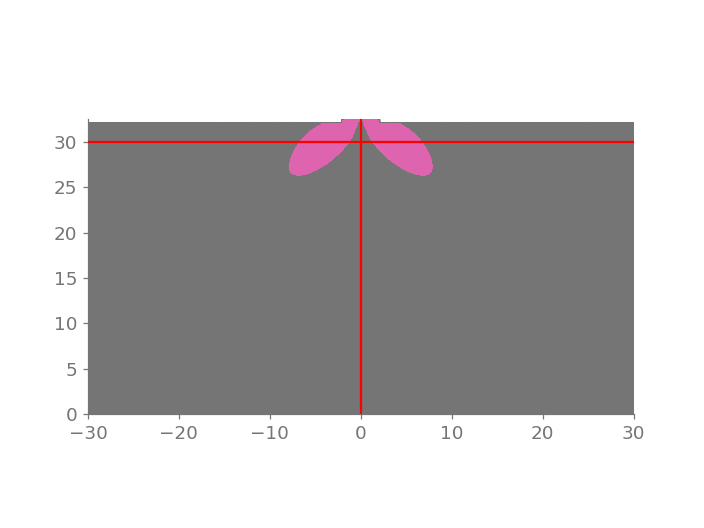

In [36]:
els = np.vstack((eles[1],eles[2],eles[3] , eles[4] , eles[5] , eles[6] , eles[7]))
ref_val= -15
filtered(nodes, els , sig_x ,ref_val)
crosshairs(0, 30)

<IPython.core.display.Javascript object>


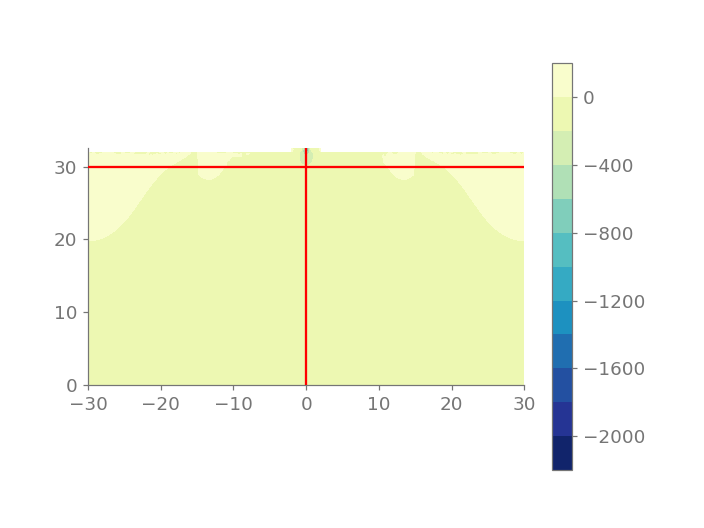

In [14]:
pos.plot_node_field(sig_y , nodes, els, plt_type="contourf", levels= 10)
crosshairs(0, 30)

<IPython.core.display.Javascript object>


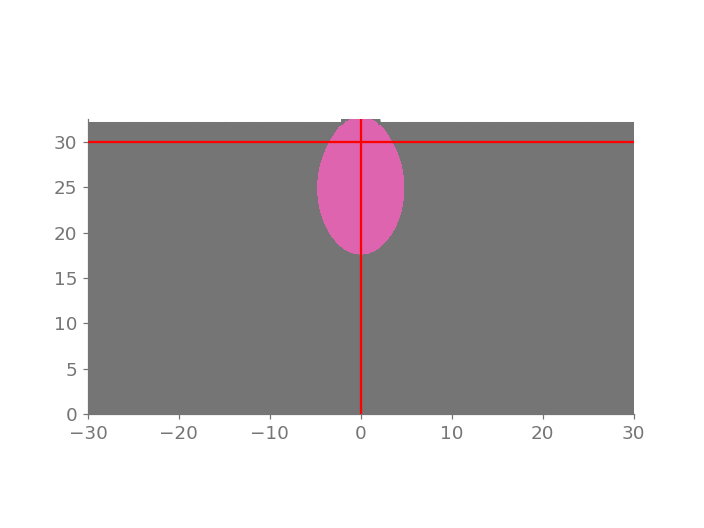

In [34]:
els = np.vstack((eles[1],eles[2],eles[3] , eles[4] , eles[5] , eles[6] , eles[7]))
ref_val= -40
filtered(nodes, els , sig_y ,ref_val)

crosshairs(0, 30)

<IPython.core.display.Javascript object>


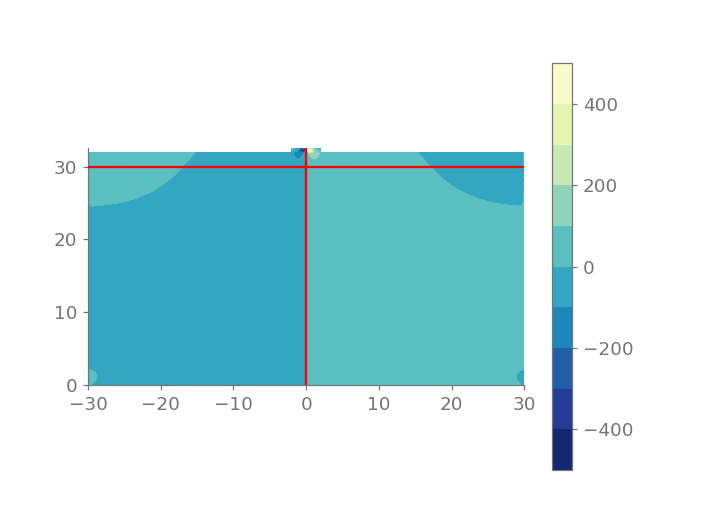

In [16]:
pos.plot_node_field(sig_xy , nodes, els, plt_type="contourf", levels= 10)
crosshairs(0, 30)

<IPython.core.display.Javascript object>


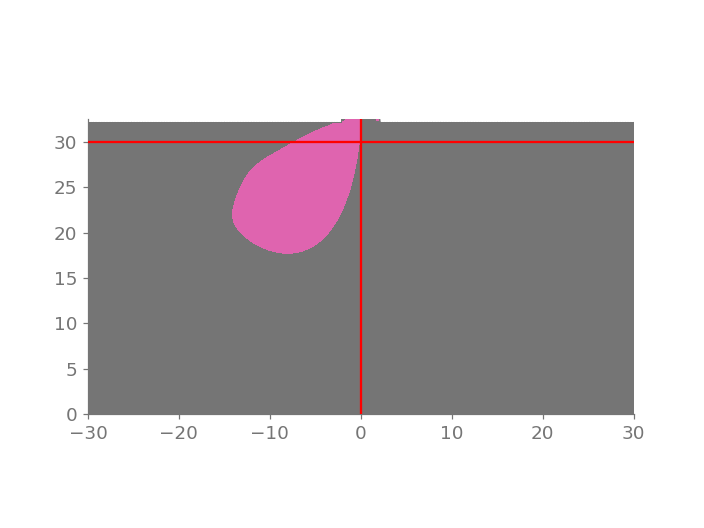

In [37]:
ref_val=-10
filtered(nodes, els , sig_xy ,ref_val)

crosshairs(0, 30)

### 4.Tensiones principales.

In [18]:
sig_1, sig_2, dir_1, dir_2 = pos.principal_dirs(S_nodes)
TAO = (np.abs(sig_1 - sig_2))/2
TAO

array([  3.46280105,   3.46282338,   8.20906049, ..., 391.52927137,
       458.19364987, 506.61442255])

<IPython.core.display.Javascript object>


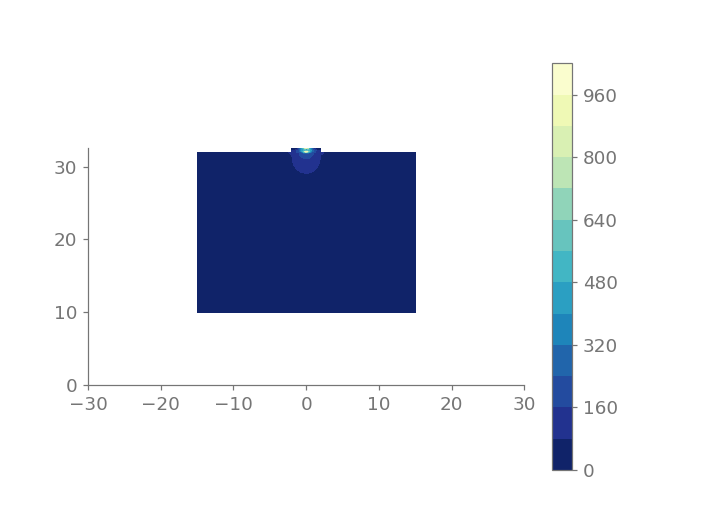

In [19]:
els = np.vstack((eles[6] ,eles[5] , eles[4] , eles[7], eles[3] ,eles[2] ))
pos.plot_node_field(TAO , nodes,  els , plt_type="contourf", levels=12)

In [43]:
pos.plot_node_field(sig_2, nodes,  els  , plt_type="contourf", levels=12)

<IPython.core.display.Javascript object>


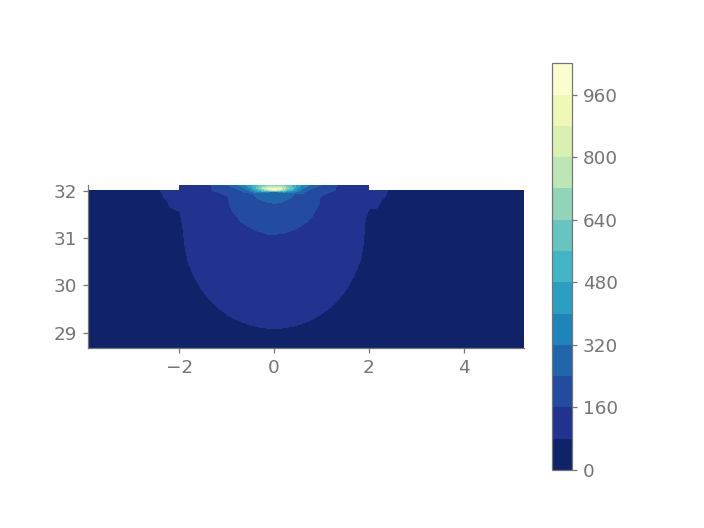

In [35]:
pos.plot_node_field(TAO , nodes,  els , plt_type="contourf", levels=12)

<div class="alert alert-warning">
    
### Recomendaciones generales para realizar un análisis de tensiones

* Como su nombre lo indica, en teoría de la elasticidad el análisis de tensiones se refiere a la determinación de la distribución (o variación) de los desplazamientos, deformaciones unitarias y tensiones en el sólido debidas a la aplicación de una distribución de cargas externas en algunas partes de la superficie o frontera del sólido.

* El proposito del análisis, además de entender la respuesta mecánica del sólido, es poder identificar posibles estados de falla y proponer medidas de solución.

* Aunque no existe un procedimiento único o pre-establecido que especifique los pasos para realizar un análisis de tensiones, tipicamente para entender la respuesta mecánica del sólido el ingeniero consultor utiliza elementos como:

     - Esquematizaciones de la configuración deformada.
     
     - Representaciones gráficas de los estados de tensiones en los diferentes      puntos del modelo.
     
     - Identificación de zonas o puntos de concentración de tensiones.
     
     - Visualizaciones de las distribuciones de tensiones máximas (i.e., tensiones principales y cortantes máximos) entre otras.    
        
### Algunas funciones de post-procesado de SolidsPy

* `fields_plot()` : Grafica los contornos de los campos tensoriales de tensiones y deformaciones resultantes del análisis.

* `principal_dirs()` : Calcula los valores y direcciones principales de un tensor simétrico de orden 2.

* `plot_node_field()` : Grafica contornos para cualquier campo especificado en los nodos de la malla.

* `filtered()` : Resalta las zonas del modelo donde se excede un valor de referencia de un campo como por ejemplo la resistencia de un material.



     
     
### Algunas unidades y equivalencias

* $1 \quad \text{ N} = 1\quad \text{ kg m/s}^2$.

* $1\quad \text{ Pa} = 1 \text{ N/m}^2$.

* $1\quad \text{ kPa} = 1 \times 10^3 \text{ Pa}$.

* $1\quad \text{ MPa} = 1 \times 10^6 \text{ Pa}$.

* $1\quad \text{ GPa} = 1 \times 10^9 \text{ Pa}$.

* $1 \quad \text{ MPa} = 100 tf/m^2$.

</div>

In [28]:
from IPython.core.display import HTML
def css_styling():
    styles = open('estilo.css', 'r').read()
    return HTML(styles)
css_styling()